Q1) adding noise using mean and std to original image

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


dog = cv2.imread("/content/dog.jpg")
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB) #since matplotlib reads rgb format and opencv read bgr format we are converting BGR2RGB for easier iterpretation in matplotlib


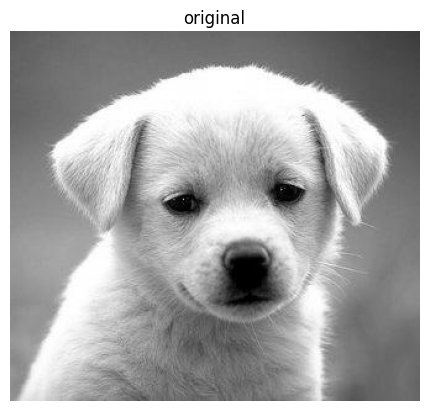

In [8]:
plt.imshow(dog)
plt.title("original")
plt.axis('off')
plt.show()

In [11]:
dog = dog.astype(np.float32) #converted to float for adding noise easily

In [12]:
mean = 0
std = 15
noise = np.random.normal(mean,std,dog.shape) #generatimg noise with the exact shape of actual image

In [14]:
noisy_dog = dog + noise #adding noise to original image


In [15]:
noisy_dog = np.clip(noisy_dog , 0 , 255) #clipping values to pixl range

In [16]:
noisy_dog = noisy_dog.astype(np.uint8)

(np.float64(-0.5), np.float64(331.5), np.float64(299.5), np.float64(-0.5))

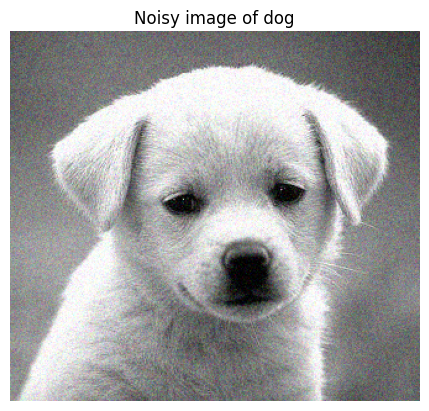

In [17]:
plt.imshow(noisy_dog)
plt.title("Noisy image of dog")
plt.axis('off')

Q2)

given kernel ([[1,0,-1],[2,0,-2],[1,0,-1]]) detects vertical edges and highlights intensity changes horizontally

In [18]:
grey = cv2.cvtColor(dog,cv2.COLOR_RGB2GRAY)
grey = grey.astype(np.float32)

In [19]:
kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=np.float32)

In [20]:
kernel = np.flip(kernel)

In [23]:
pad = 1
padded = np.pad(grey , ((pad,pad),(pad,pad)), mode='constant') #padding adds borders so that image doesnt change after convolution

In [31]:
h, w = grey.shape
final_image = np.zeros((h, w), dtype=np.float32)


In [32]:
for i in range(h):
    for j in range(w):
        area = padded[i:i+3, j:j+3]
        final_image[i, j] = np.sum(area * kernel)


In [35]:
final_image = np.clip(final_image,0,255)
final_image = final_image.astype(np.uint8)

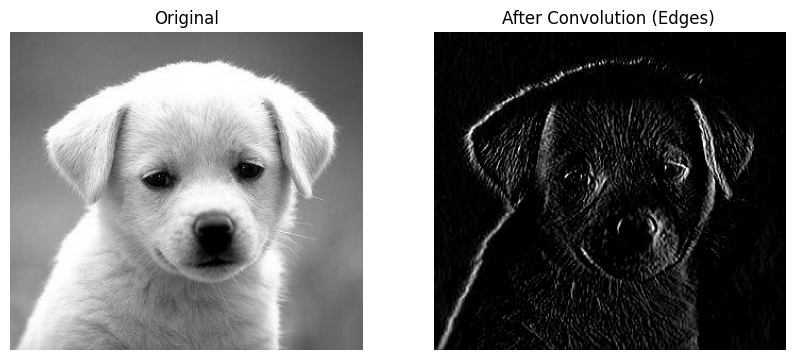

In [36]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(grey, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("After Convolution (Edges)")
plt.imshow(final_image, cmap='gray')
plt.axis('off')

plt.show()


Q3)

In [69]:
def gaussian_kernel(size=7, sigma=1):
    ax = np.arange(-(size//2), size//2 + 1)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)

    return kernel


In [76]:
def convolve(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    pad = kernel.shape[0] // 2

    padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')

    h, w = image.shape
    output = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            area = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            output[i, j] = np.sum(area * kernel)

    return output


In [77]:
gauss = gaussian_kernel(7, 1)

denoised = convolve(noisy_dog.astype(np.float32), gauss)
denoised = np.clip(denoised, 0, 255).astype(np.uint8)


In [78]:
sharpen_kernel = np.array([
 [1, 4, 6, 4, 1],
 [4,16,24,16,4],
 [6,24,-476,24,6],
 [4,16,24,16,4],
 [1, 4, 6, 4, 1]
]) * (-1.0 / 256.0)


In [79]:
sharpened = convolve(denoised.astype(np.float32), sharpen_kernel)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)


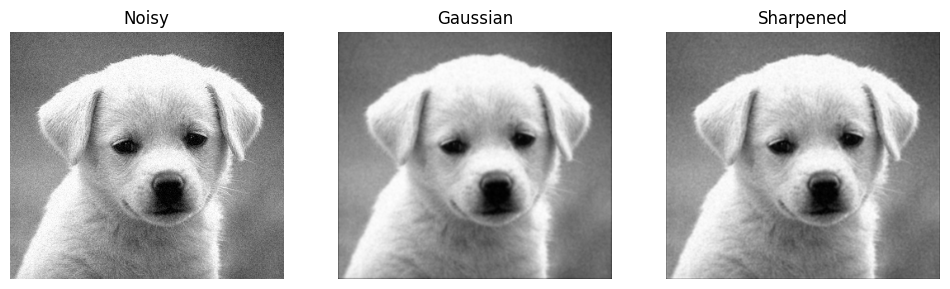

In [80]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Noisy")
plt.imshow(noisy_dog, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Gaussian")
plt.imshow(denoised, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Sharpened")
plt.imshow(sharpened, cmap='gray')
plt.axis('off')

plt.show()


Q4)

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

shelf = cv2.imread('/content/shelf.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('/content/template.jpg', cv2.IMREAD_GRAYSCALE)

shelf = shelf.astype(np.float32)
template = template.astype(np.float32)


In [82]:
# subtracting mean to remove intensity bias as most areas are white so they will always givehigh values
shelf = shelf - np.mean(shelf)
template = template - np.mean(template)


In [88]:
H, W = shelf.shape
h, w = template.shape

result = np.zeros((H - h + 1, W - w + 1))

for i in range(H - h + 1):
    for j in range(W - w + 1):
        region = shelf[i:i+h, j:j+w]
        result[i, j] = np.sum(region * template)


In [89]:
y, x = np.unravel_index(np.argmax(result), result.shape)


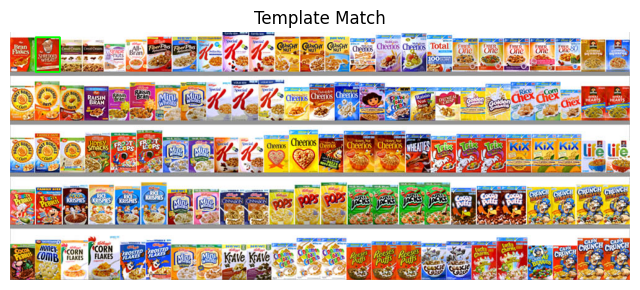

In [90]:
shelf_display = cv2.imread('/content/shelf.jpg')
shelf_display = cv2.cvtColor(shelf_display, cv2.COLOR_BGR2RGB)

cv2.rectangle(shelf_display, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(8,6))
plt.imshow(shelf_display)
plt.title("Template Match")
plt.axis('off')
plt.show()


In [93]:
#convolution
template_flip = np.flip(np.flip(template))


In [94]:
result_conv = np.zeros((H - h + 1, W - w + 1))

for i in range(H - h + 1):
    for j in range(W - w + 1):
        region = shelf[i:i+h, j:j+w]
        result_conv[i, j] = np.sum(region * template_flip)


In [95]:
y_conv, x_conv = np.unravel_index(np.argmax(result_conv), result_conv.shape)


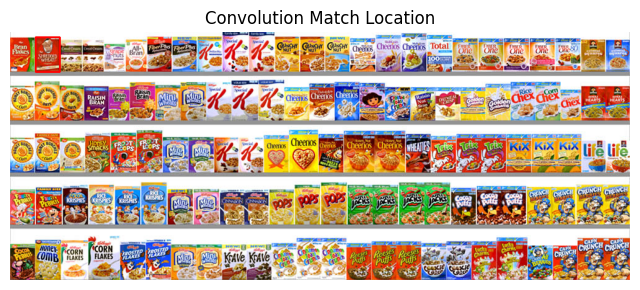

In [96]:
shelf_display = cv2.imread('/content/shelf.jpg')
shelf_display = cv2.cvtColor(shelf_display, cv2.COLOR_BGR2RGB)

cv2.rectangle(shelf_display, (x_conv, y_conv),
              (x_conv + w, y_conv + h),
              (255, 0, 0), 2)   # Red box for convolution

plt.figure(figsize=(8,6))
plt.imshow(shelf_display)
plt.title("Convolution Match Location")
plt.axis('off')
plt.show()


here, both convolution and correlation located the product at the same position. However, correlation will be  preferred because it preserves the template orientation, while convolution flips the template.

In [98]:
print("Correlation location:", (x, y))
print("Convolution location:", (x_conv, y_conv))


Correlation location: (np.int64(41), np.int64(8))
Convolution location: (np.int64(41), np.int64(8))
